<a href="https://colab.research.google.com/github/yanirasilva-star/ICD/blob/main/Data_Lead_TG1_(6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introducci√≥n A Ciencia De Datos Y Machine Learning Con Python**

**Integrantes:**



*   Arizaba Garcia Topacio

*   Silva Ruiz Yanira
*   Vega castro Angie


*   Vazquez Milian Andy


**Profesor:** Luis Jose Zapata Bobadilla

**Universidad de Piura**

# **Pregunta**: *¬øCu√°l es la influencia de la tasa de inter√©s de referencia en la din√°mica de la inflaci√≥n en el corto plazo en el Per√∫?* üìà
___

## **Informaci√≥n antes de la limpieza**

### **1. Definici√≥n del periodo y variables**

 **PERI√ìDO**
* Periodo inicial: **Enero del 2010**
* Periodo final: **Agosto del 2025**

**VARIABLES**
1. PN38705PM: Inflaci√≥n mensual (variaci√≥n % IPC)
2. PD04722MM: Tasa de inter√©s de referencia (TIR)
3. PN07819NM: Tasa de inter√©s interbancaria promedio
4.  PN06522TM: repo de valores saldo
5. PN06534TM: dep√≥sitos p√∫blicos saldo
6. PN06502OM: CD BCRP - Total - Saldo
7. PN06503OM: CD BCRP - Tasa de √≠nteres - Saldo
8. PN07150NM: Depositos overnight BCRP (promedio diario) - Empresas Bancarias (miles S/)
9. PD04724MM: Tasa de los Dep√≥sitos Overnight en MN

Entre ellas, la inflaci√≥n (IPC) y la tasa de referencia son las variables principales.
Las dem√°s funcionan como canales de transmisi√≥n (tasa interbancaria, dep√≥sitos overnight) o instrumentos operativos (repos, CDBCR, dep√≥sitos).



**Librerias**
  `pandas`, `numpy`y `requests` para hacer petici√≥n a la web.

**Formato:**  se usa `json  `,es la manera m√°s pr√°ctica y est√°ndar de recibir la informaci√≥n y convertirla en objetos de Python para trabajar con ellos.

Realiza una solicitud GET a la API de BCRP utilizando `requests.get()`
Comprueba si la solicitud fue exitosa (c√≥digo de estado 200).
Si la operaci√≥n es correcta, analiza la respuesta JSON en un diccionario de Python y la almacena en la datavariable. De lo contrario, muestra un mensaje de error.





---



In [ ]:
# Primero, importamos las librer√≠as que necesitaremos
import requests  # La librer√≠a est√°ndar en Python para hacer peticiones a la web
import pandas as pd
import numpy as np

# 1. Definimos los par√°metros de nuestra consulta
codigos = 'PN38705PM-PD04722MM-PN07819NM-PN06522TM-PN06534TM-PN06502OM-PN06503OM-PN07150NM-PD04724MM'
formato = 'json' # Pedimos los datos en formato JSON
periodo_inicial = '2010-01'
periodo_final = '2025-08'

# 2. Construimos la URL completa
url = f"https://estadisticas.bcrp.gob.pe/estadisticas/series/api/{codigos}/{formato}/{periodo_inicial}/{periodo_final}"

# 3. Hacemos la petici√≥n GET a la web del BCRP
response = requests.get(url)

# 4. Verificamos que la petici√≥n fue exitosa (un c√≥digo 200 significa que todo sali√≥ bien)
if response.status_code == 200:
    print("¬°Conexi√≥n exitosa con el API del BCRP!")
    # Convertimos la respuesta a un formato de diccionario de Python
    data = response.json()
else:
    print(f"Error al conectar con el API. C√≥digo de estado: {response.status_code}")
    data = None

¬°Conexi√≥n exitosa con el API del BCRP!


### **2.Inspecci√≥n de la estructura de datos sin procesar:**

Antes de convertir los datos a un formato estructurado como un DataFrame de Pandas, inspeccionamos los datos sin procesar recibidos de la API de BCRP para comprender su organizaci√≥n. Esto se realiz√≥ imprimiendo las dos primeras y la √∫ltima entrada de la  lista "periods"  dentro del  objeto "data"  . Esto nos permiti√≥ ver:

*    El formato de la informaci√≥n de fecha (que  m√°s tarde se convertir√≠a en la  columna **'Fecha'**  en nuestro DataFrame).
*  C√≥mo se almacenan   los valores de cada variable (que m√°s tarde llenar√≠an columnas como  **'Tasa\_Ref (%)'** ,  **'IPC (%)'** , etc.) en una lista para cada per√≠odo.
*    El orden en que aparecen estos valores de variable  en la lista para cada per√≠odo, lo cual fue crucial para  extraer y etiquetar correctamente los datos en las columnas apropiadas del DataFrame.

Este paso confirm√≥ que los datos est√°n estructurados como  una lista de per√≠odos, donde cada per√≠odo contiene una fecha y una lista de valores de variables correspondientes en  un orden consistente, prepar√°ndonos para crear nuestro DataFrame estructurado.

In [ ]:
# Miremos los datos de los primeros dos periodos para entender la estructura
# [tasa de inter√©s de ref, tasa de dep√≥sitos overnight, CDBCR total saldo, CDBCR saldo tasa de inter√©s, repos de valores, dep√≥sitos p√∫blicos, dep√≥sitos overnight BCR,  tasa de inter√©s interbancaria, IPC]
if data:
    print(data['periods'][0])
    print(data['periods'][1])
    print(data['periods'][-1])

{'name': 'Ene.2010', 'values': ['1.25', '0.45', '19352.2', '1.48499168053245', '0', '0', 'n.d.', '1', '69.7136816328321']}
{'name': 'Feb.2010', 'values': ['1.25', '0.45', '20057.9', '1.48248012005245', '0', '0', 'n.d.', '1.21524', '69.9385138944542']}
{'name': 'Ago.2025', 'values': ['4.5', '2.5', '43991.9', '4.2065169497112', '7306.947803', '4024.9', '78929.5483870968', '4.5079', '115.586828']}


### **3. Estructuraci√≥n de los datos en un DataFrame:**

Este bloque de c√≥digo se centra en convertir los datos sin procesar , en formato de lista de diccionarios, en  un DataFrame estructurado de Pandas.

As√≠ es como funciona:

* **Inicializaci√≥n de listas:**  Se crean listas vac√≠as para cada variable (p. ej.,  `fechas` ,  `tir` ,  `ipc` ) para almacenar temporalmente los datos extra√≠dos.  
*  **Iteraci√≥n por per√≠odos:**  El c√≥digo recorre cada  `period`  en la  lista `data['periods']`  obtenida de la API de BCRP.  
*  **Extracci√≥n de datos:**  Dentro del bucle:  
    *  Se extrae    la fecha ( `period['name']` ) y se agrega a la  lista `fechas` .
    *  Se extrae   la lista de valores de todas las variables ( `period['values']` ).
    *    Para cada variable, se accede al valor correspondiente desde la  lista `valores`  usando su √≠ndice (seg√∫n el orden de los c√≥digos  en la llamada a la API).
    *    El valor extra√≠do se convierte a un  `float`  si es un n√∫mero v√°lido. Si el valor es 'nd' (que indica no disponible), se reemplaza con  `np.nan`  (no es un n√∫mero) para representar los datos faltantes en el DataFrame .
    *    Estos valores procesados ‚Äã‚Äãse a√±aden a sus respectivas listas.
*  **Creaci√≥n del DataFrame:**  Despu√©s de procesar todos los per√≠odos,   se crea un diccionario `datos_para_df` . Las claves de este diccionario son los nombres de columna deseados para el DataFrame (por ejemplo, 'Fech a', 'Tasa\_Ref (%)'), y los valores son las listas  que contienen los datos extra√≠dos y procesados ‚Äã‚Äãpara cada variable.  
*  **Relleno del DataFrame:** Finalmente,  se crea   un DataFrame de pandas  `df_bcrp` a partir del diccionario `datos_para_df`  . La  l√≠nea `display(df_bcrp.head())`  muestra las primeras filas del DataFrame reci√©n creado, lo que permite una r√°pida verificaci√≥n de  la estructura y los datos.

Este proceso transforma eficazmente los datos sin procesar de la API en un formato tabular limpio, listo para su posterior an√°lisis y visualizaci√≥n en los  pasos posteriores.

In [ ]:
if data:
    # Creamos listas vac√≠as
    fechas = []
    tir = []
    tover = []
    cdbcr_total = []
    cdbcr_tir = []
    repos_valores = []
    depositos_publicos = []
    depositos_overnight = []
    interbancaria = []
    ipc = []


    # Iteramos sobre los periodos en los datos del BCRP
    for periodo in data['periods']:
        fechas.append(periodo['name'])

        # Los valores vienen en el mismo orden en que pusiste los c√≥digos en la URL:
        # PN38705PM - PD04722MM - PN07839NM - PN06525TM - PN06534TM
        valores = periodo['values']

        # Tasa de inter√©s de referencia
        tir.append(float(valores[0]) if valores[0] != 'n.d.' else np.nan)
        # Depositos overnight
        tover.append(float(valores[1]) if valores[1] != 'n.d.' else np.nan)
        # CDBCR total saldo
        cdbcr_total.append(float(valores[2]) if valores[2] != 'n.d.' else np.nan)
        # CDBCR saldo tasa de inter√©s
        cdbcr_tir.append(float(valores[3]) if valores[3] != 'n.d.' else np.nan)
       # Repos (saldo)
        repos_valores.append(float(valores[4]) if valores[4] != 'n.d.' else np.nan)
       # Dep√≥sitos p√∫blicos (saldo)
        depositos_publicos.append(float(valores[5]) if valores[5] != 'n.d.' else np.nan)
        # Depositos overnight BCR
        depositos_overnight.append(float(valores[6]) if valores[6] != 'n.d.' else np.nan)
        # Tasa interbancaria promedio
        interbancaria.append(float(valores[7]) if valores[7] != 'n.d.' else np.nan)
        # IPC (variaci√≥n %)
        ipc.append(float(valores[8]) if valores[8] != 'n.d.' else np.nan)

            # Construimos el DataFrame
    datos_para_df = {
        'Fecha': fechas,
        'Tasa_Ref (%)': tir,
        'Tasa_Depositos_Overnight (%)': tover,
        'CDBCR_Total_Saldo (S/ millones)': cdbcr_total,
        'CDBCR_Saldo_TIR (%)': cdbcr_tir,
        'Repos_Valores (S/ millones)': repos_valores,
        'Depositos_Publicos_Saldo (S/ millones)': depositos_publicos,
        'Depositos_Overnight_BCR (S/ miles)': depositos_overnight,
        'Tasa_Interbancaria (%)': interbancaria,
        'IPC (%)': ipc,

    }

    df_bcrp = pd.DataFrame(datos_para_df)

    print("DataFrame creado exitosamente:")
    display(df_bcrp.head())
else:
    print("No se pudieron cargar los datos para crear el DataFrame.")


DataFrame creado exitosamente:


Fecha  Tasa_Ref (%)  Tasa_Depositos_Overnight (%)  \
0  Ene.2010          1.25                          0.45   
1  Feb.2010          1.25                          0.45   
2  Mar.2010          1.25                          0.45   
3  Abr.2010          1.25                          0.45   
4  May.2010          1.50                          0.70   

   CDBCR_Total_Saldo (S/ millones)  CDBCR_Saldo_TIR (%)  \
0                          19352.2             1.484992   
1                          20057.9             1.482480   
2                          21752.6             1.496076   
3                          19070.7             1.438794   
4                          17733.4             1.356306   

   Repos_Valores (S/ millones)  Depositos_Publicos_Saldo (S/ millones)  \
0                          0.0                                     0.0   
1                          0.0                                     0.0   
2                          0.0                                     0.0   
3                          0.0                                     0.0   
4                          0.0                                     0.0   

   Depositos_Overnight_BCR (S/ miles)  Tasa_Interbancaria (%)    IPC (%)  
0                                 NaN                 1.00000  69.713682  
1                                 NaN                 1.21524  69.938514  
2                                 NaN                 1.23264  70.134910  
3                                 NaN                 1.21970  70.152694  
4                                 NaN                 1.44610  70.319559

###**4. Informaci√≥n descriptiva de la data**

In [ ]:
df_bcrp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Fecha                                   188 non-null    object 
 1   Tasa_Ref (%)                            188 non-null    float64
 2   Tasa_Depositos_Overnight (%)            188 non-null    float64
 3   CDBCR_Total_Saldo (S/ millones)         188 non-null    float64
 4   CDBCR_Saldo_TIR (%)                     188 non-null    float64
 5   Repos_Valores (S/ millones)             188 non-null    float64
 6   Depositos_Publicos_Saldo (S/ millones)  188 non-null    float64
 7   Depositos_Overnight_BCR (S/ miles)      173 non-null    float64
 8   Tasa_Interbancaria (%)                  188 non-null    float64
 9   IPC (%)                                 188 non-null    float64
dtypes: float64(9), object(1)
memory usage: 14.8+ KB


In [ ]:
df_bcrp.describe()

Tasa_Ref (%)  Tasa_Depositos_Overnight (%)  \
count    188.000000                    188.000000   
mean       3.731383                      2.518085   
std        1.806753                      1.305026   
min        0.250000                      0.150000   
25%        2.750000                      1.500000   
50%        4.000000                      2.750000   
75%        4.250000                      3.450000   
max        7.750000                      5.250000   

       CDBCR_Total_Saldo (S/ millones)  CDBCR_Saldo_TIR (%)  \
count                       188.000000           188.000000   
mean                      31602.873936             3.764552   
std                       13886.277523             1.662738   
min                       12757.200000             0.364835   
25%                       20975.000000             2.800000   
50%                       28635.050000             3.895000   
75%                       38553.075000             4.539318   
max                       81435.000000             7.571590   

       Repos_Valores (S/ millones)  Depositos_Publicos_Saldo (S/ millones)  \
count                   188.000000                              188.000000   
mean                   4502.582211                             2265.238298   
std                    4497.319051                             2239.238064   
min                       0.000000                                0.000000   
25%                       0.000000                                0.000000   
50%                    3217.000000                             1904.000000   
75%                    7744.683148                             4100.100000   
max                   15654.446000                             7044.400000   

       Depositos_Overnight_BCR (S/ miles)  Tasa_Interbancaria (%)     IPC (%)  
count                        1.730000e+02              188.000000  188.000000  
mean                         7.373671e+05                3.747771   90.084022  
std                          1.201505e+06                1.816596   13.674008  
min                          1.910300e+04                0.110600   69.713682  
25%                          2.008710e+05                2.752650   78.497451  
50%                          3.785680e+05                4.000950   88.756454  
75%                          7.480710e+05                4.368450   98.438826  
max                          8.106778e+06                7.761200  115.923300

 **Informaci√≥n General:**

 Los principales hallazgos del an√°lisis, basado en las funciones `df_bcrp.info()` y `df_bcrp.describe().`

El DataFrame contiene 173 observaciones y 10 columnas.

**Estad√≠sticas Descriptivas Clave:**

* **Tasa de Referencia (Tasa_Ref %):** Muestra variabilidad esperada con un rango de 0.25% a 7.75% (media de 3.83%), reflejando ajustes de pol√≠tica monetaria.

* **IPC (%)**: Presenta un rango amplio (70.95% a 115.92%, media de 91.68%) con una desviaci√≥n est√°ndar notable (13.06), indicando fluctuaciones en la inflaci√≥n, incluyendo picos.

* **Canales de Transmisi√≥n e Instrumentos Operativos:** Tasas como la interbancaria y de dep√≥sitos overnight, as√≠ como los saldos de repos y CDBCR, exhiben mayor volatilidad y rangos amplios, especialmente durante per√≠odos de crisis, lo que sugiere su uso activo por parte del BCRP.
Correlaciones: Existe una alta correlaci√≥n entre la Tasa de Referencia y otras tasas de inter√©s (interbancaria, dep√≥sitos overnight, y TIR de CDBCR), confirmando su rol en la transmisi√≥n de la pol√≠tica monetaria. La correlaci√≥n positiva entre Repos y el IPC podr√≠a indicar el uso de liquidez en respuesta a presiones inflacionarias o viceversa.
Conclusi√≥n:

El an√°lisis descriptivo revela que el DataFrame ``df_bcrp contiene informaci√≥n relevante sobre la pol√≠tica monetaria y la inflaci√≥n en Per√∫.

###**5.Limpieza de data**

**5.1 Eliminar datos faltanes:**
Este bloque de c√≥digo se encarga de la limpieza de datos, espec√≠ficamente eliminando filas que contienen valores faltantes (NaN) en cualquier columna del DataFrame `df_bcrp`.


* `df_bcrp.dropna(inplace=True)`Esta l√≠nea elimina cualquier fila del DataFrame df_bcrpque contenga al menos un valor faltante ( NaN).
* `El inplace=True`Modifica el DataFrame directamente sin crear uno nuevo.
`df_bcrp.info()`:Esta l√≠nea muestra luego un resumen conciso del DataFrame modificado.
El resultado `df_bcrp.info()`despu√©s de la ejecuci√≥n `dropna()`muestra la estructura del DataFrame, incluyendo el n√∫mero de entradas (filas) y el recuento de valores no nulos en cada columna. Si el n√∫mero de entradas es menor que el original (que era 188 antes de este paso, como se muestra en el resultado del paso anterior `df_bcrp.info()`), significa que se eliminaron correctamente algunas filas con valores faltantes.






In [ ]:
# Eliminar las filas con valores faltantes en cualquier columna
df_bcrp.dropna(inplace=True)

# Verificar nuevamente el estado del DataFrame
df_bcrp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, 11 to 187
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Fecha                                   173 non-null    object 
 1   Tasa_Ref (%)                            173 non-null    float64
 2   Tasa_Depositos_Overnight (%)            173 non-null    float64
 3   CDBCR_Total_Saldo (S/ millones)         173 non-null    float64
 4   CDBCR_Saldo_TIR (%)                     173 non-null    float64
 5   Repos_Valores (S/ millones)             173 non-null    float64
 6   Depositos_Publicos_Saldo (S/ millones)  173 non-null    float64
 7   Depositos_Overnight_BCR (S/ miles)      173 non-null    float64
 8   Tasa_Interbancaria (%)                  173 non-null    float64
 9   IPC (%)                                 173 non-null    float64
dtypes: float64(9), object(1)
memory usage: 14.9+ KB


2.2 Columnas irrelevantes

In [ ]:
df_bcrp.describe()

Tasa_Ref (%)  Tasa_Depositos_Overnight (%)  \
count    173.000000                    173.000000   
mean       3.830925                      2.581792   
std        1.817217                      1.295610   
min        0.250000                      0.150000   
25%        2.750000                      1.500000   
50%        4.000000                      2.750000   
75%        4.250000                      3.450000   
max        7.750000                      5.250000   

       CDBCR_Total_Saldo (S/ millones)  CDBCR_Saldo_TIR (%)  \
count                       173.000000           173.000000   
mean                      32352.843931             3.866986   
std                       14181.308983             1.662927   
min                       12757.200000             0.364835   
25%                       23445.800000             3.000000   
50%                       29466.000000             3.940000   
75%                       39269.800000             4.600000   
max                       81435.000000             7.571590   

       Repos_Valores (S/ millones)  Depositos_Publicos_Saldo (S/ millones)  \
count                   173.000000                              173.000000   
mean                   4892.979512                             2461.646243   
std                    4479.782535                             2228.266819   
min                       0.000000                                0.000000   
25%                     800.000000                                0.000000   
50%                    4383.299619                             2100.000000   
75%                    8185.646000                             4100.200000   
max                   15654.446000                             7044.400000   

       Depositos_Overnight_BCR (S/ miles)  Tasa_Interbancaria (%)     IPC (%)  
count                        1.730000e+02              173.000000  173.000000  
mean                         7.373671e+05                3.855318   91.683913  
std                          1.201505e+06                1.820581   13.063218  
min                          1.910300e+04                0.110600   70.951291  
25%                          2.008710e+05                2.784900   80.929225  
50%                          3.785680e+05                4.074600   89.440878  
75%                          7.480710e+05                4.464100  100.037268  
max                          8.106778e+06                7.761200  115.923300

2.3 Filas repetidas

In [ ]:
# Ver las filas duplicadas
duplicadas = df_bcrp[df_bcrp.duplicated()]
print(duplicadas)

Empty DataFrame
Columns: [Fecha, Tasa_Ref (%), Tasa_Depositos_Overnight (%), CDBCR_Total_Saldo (S/ millones), CDBCR_Saldo_TIR (%), Repos_Valores (S/ millones), Depositos_Publicos_Saldo (S/ millones), Depositos_Overnight_BCR (S/ miles), Tasa_Interbancaria (%), IPC (%)]
Index: []


### **6. Detecci√≥n de Posibles Outliers**

Este bloque de c√≥digo tiene como objetivo **identificar posibles valores at√≠picos (outliers)** en las columnas num√©ricas del DataFrame `df_bcrp` utilizando el m√©todo del **Rango Intercuart√≠lico (IQR)**.

- **`columnas_numericas = df_bcrp.select_dtypes(include=['float64', 'int64'])`**  
  Selecciona solo las columnas num√©ricas (`float64` o `int64`) del DataFrame `df_bcrp` y las guarda en `columnas_numericas`.  
  Esto es necesario porque el c√°lculo de outliers basado en IQR solo es aplicable a datos num√©ricos.

- **`Q1 = columnas_numericas.quantile(0.25)`**  
  Calcula el **primer cuartil (Q1)** para cada columna num√©rica.  
  El Q1 representa el valor por debajo del cual se encuentra el 25 % de los datos.

- **`Q3 = columnas_numericas.quantile(0.75)`**  
  Calcula el **tercer cuartil (Q3)** para cada columna num√©rica.  
  El Q3 representa el valor por debajo del cual se encuentra el 75 % de los datos.

- **`IQR = Q3 - Q1`**  
  Calcula el **Rango Intercuart√≠lico (IQR)**, que es la diferencia entre Q3 y Q1.  
  El IQR mide la dispersi√≥n de la mitad central de los datos.

- **`outliers = ((columnas_numericas < (Q1 - 1.5 * IQR)) | (columnas_numericas > (Q3 + 1.5 * IQR))).sum()`**  
  Detecta los posibles outliers.  
  Se considera un rango "normal" para los datos: `[Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]`.  
  Cualquier valor fuera de este rango se considera un posible outlier.  
  La expresi√≥n genera un DataFrame con `True` donde hay un outlier y `False` en caso contrario.  
  El `.sum()` cuenta la cantidad de `True` en cada columna (cantidad de outliers).


In [ ]:
# Seleccionar solo las columnas num√©ricas
columnas_numericas = df_bcrp.select_dtypes(include=['float64', 'int64'])

# Calcular el IQR solo para las columnas num√©ricas
Q1 = columnas_numericas.quantile(0.25)
Q3 = columnas_numericas.quantile(0.75)
IQR = Q3 - Q1

# Detectar outliers
outliers = ((columnas_numericas < (Q1 - 1.5 * IQR)) | (columnas_numericas > (Q3 + 1.5 * IQR))).sum()

# Mostrar el conteo de outliers por variable
print("Cantidad de posibles outliers por variable:")
print(outliers)



Cantidad de posibles outliers por variable:
Tasa_Ref (%)                              32
Tasa_Depositos_Overnight (%)               0
CDBCR_Total_Saldo (S/ millones)           11
CDBCR_Saldo_TIR (%)                       20
Repos_Valores (S/ millones)                0
Depositos_Publicos_Saldo (S/ millones)     0
Depositos_Overnight_BCR (S/ miles)        19
Tasa_Interbancaria (%)                    28
IPC (%)                                    0
dtype: int64


### **7. Graficos**

### **7.1 Boxplots**



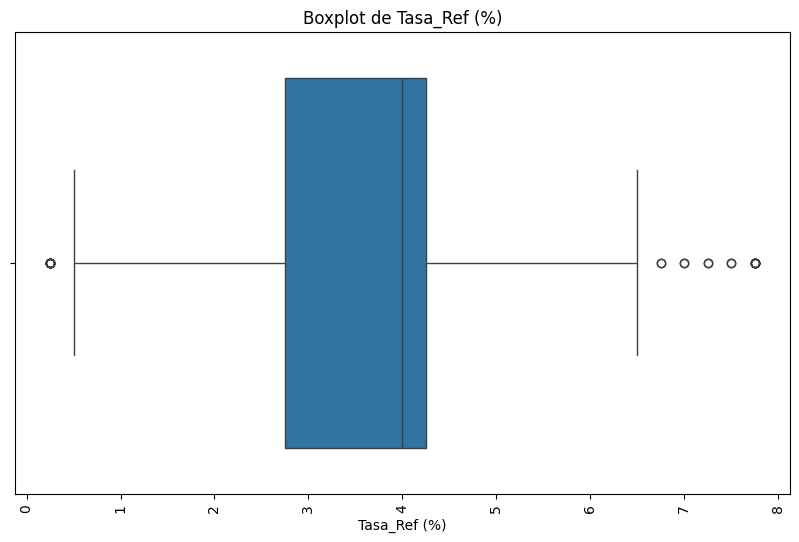

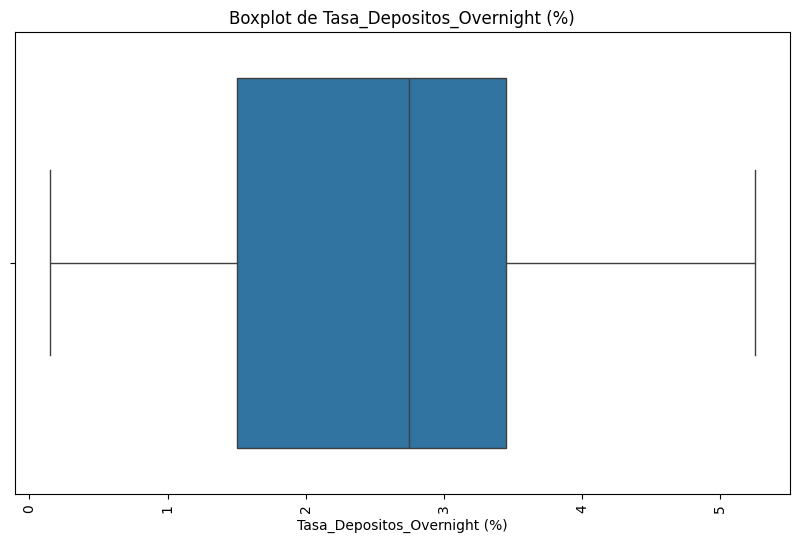

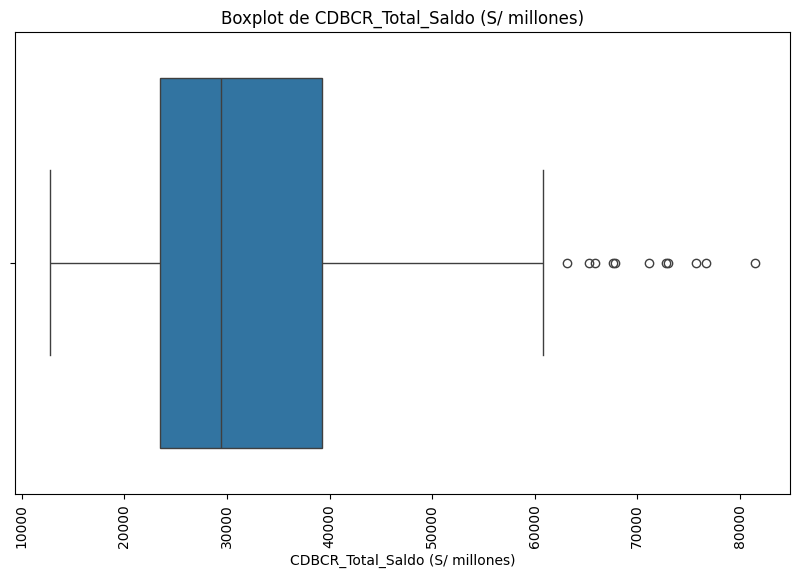

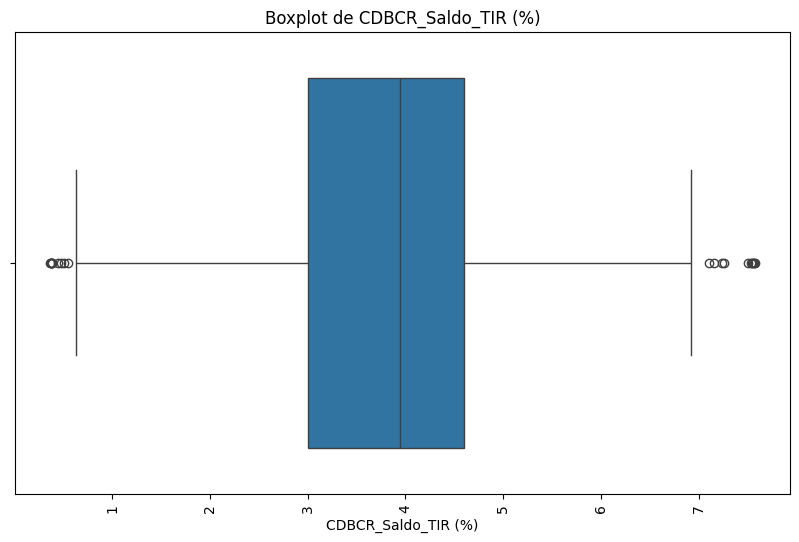

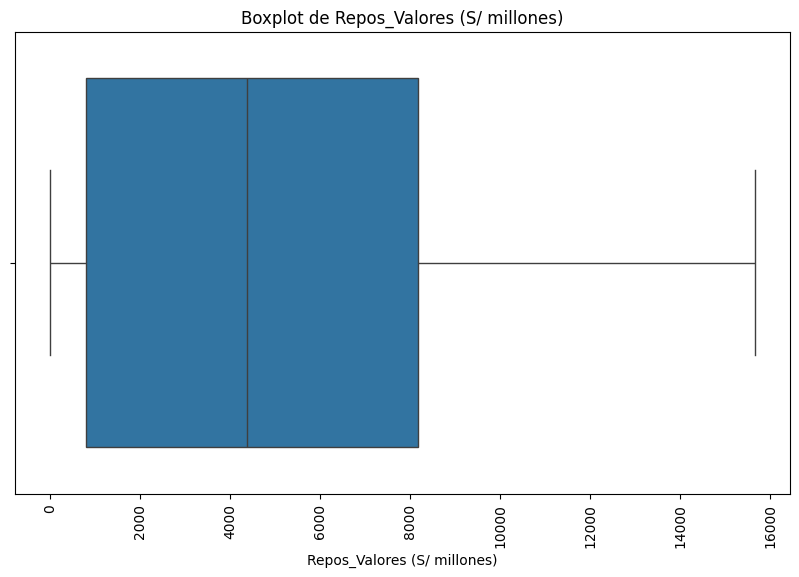

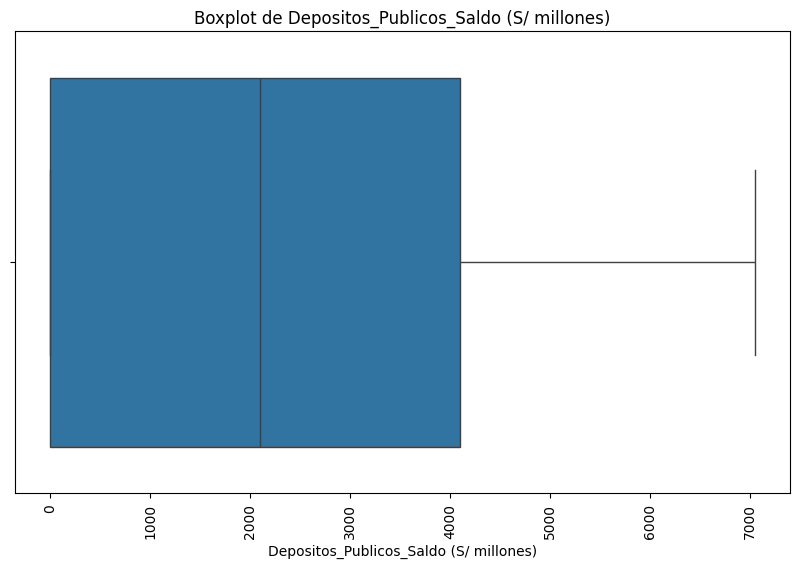

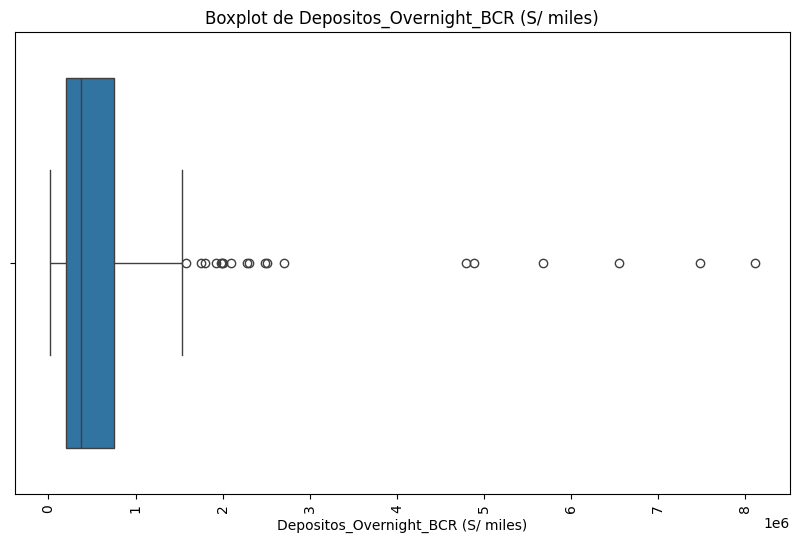

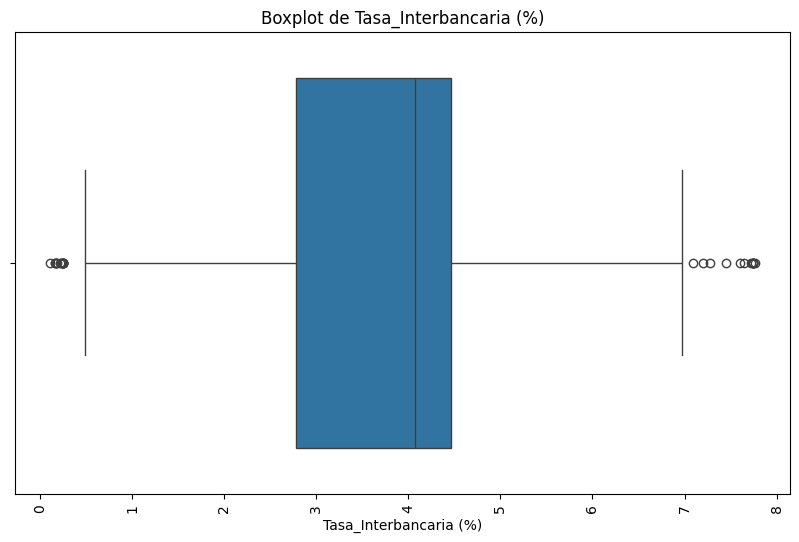

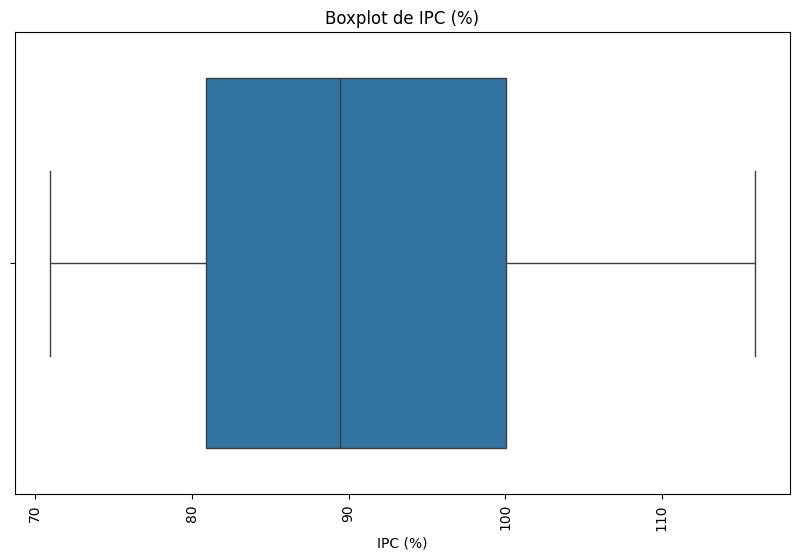

In [ ]:
 import seaborn as sns
import matplotlib.pyplot as plt

# Definir las columnas num√©ricas de inter√©s
variables = columnas_numericas.columns

# Crear un boxplot por cada variable
for var in variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_bcrp[var])
    plt.title(f'Boxplot de {var}')
    plt.xticks(rotation=90)  # Rotar las etiquetas del eje X para mejor visibilidad
    plt.show()

**Interpretaci√≥n:**

Estos gr√°ficos nos ayudan a entender la distribuci√≥n de los datos de cada variable. Cada caja representa el 50% de los valores centrales, la l√≠nea en el medio es la mediana, y las l√≠neas que se extienden (bigotes) muestran el rango general de los datos.

En los gr√°ficos de las tasas de inter√©s (Tasa_Ref, Tasa_Interbancaria y Tasa_Depositos_Overnight), las cajas son muy estrechas. Esto significa que los valores de estas tasas no var√≠an mucho, lo cual es normal porque el Banco Central las controla. Los puntos que ves fuera de los "bigotes" son valores at√≠picos, que pueden representar momentos de cambios abruptos en la pol√≠tica monetaria.

En el gr√°fico de la inflaci√≥n (IPC), la caja es m√°s ancha, mostrando que este indicador es m√°s vol√°til que las tasas de inter√©s. Aun as√≠, la mayor√≠a de los datos se agrupan de forma predecible sin tener valores extremadamente altos o bajos.

Finalmente, los gr√°ficos de los saldos (CDBCR_Total_Saldo, Repos_Valores y Dep√≥sitos_P√∫blicos_Saldo) tienen cajas muy peque√±as, pero con muchos puntos dispersos por encima. Esto nos dice que, aunque la mayor√≠a de los valores son bajos, hay ocasiones en las que se registran transacciones o saldos excepcionalmente grandes. Estos valores at√≠picos son comunes en los mercados financieros, ya que reflejan operaciones extraordinarias de gran escala que ocurren con poca frecuencia.

## **Informaci√≥n despues de la limpieza**

In [ ]:
df_bcrp.describe()

Tasa_Ref (%)  Tasa_Depositos_Overnight (%)  \
count    173.000000                    173.000000   
mean       3.830925                      2.581792   
std        1.817217                      1.295610   
min        0.250000                      0.150000   
25%        2.750000                      1.500000   
50%        4.000000                      2.750000   
75%        4.250000                      3.450000   
max        7.750000                      5.250000   

       CDBCR_Total_Saldo (S/ millones)  CDBCR_Saldo_TIR (%)  \
count                       173.000000           173.000000   
mean                      32352.843931             3.866986   
std                       14181.308983             1.662927   
min                       12757.200000             0.364835   
25%                       23445.800000             3.000000   
50%                       29466.000000             3.940000   
75%                       39269.800000             4.600000   
max                       81435.000000             7.571590   

       Repos_Valores (S/ millones)  Depositos_Publicos_Saldo (S/ millones)  \
count                   173.000000                              173.000000   
mean                   4892.979512                             2461.646243   
std                    4479.782535                             2228.266819   
min                       0.000000                                0.000000   
25%                     800.000000                                0.000000   
50%                    4383.299619                             2100.000000   
75%                    8185.646000                             4100.200000   
max                   15654.446000                             7044.400000   

       Depositos_Overnight_BCR (S/ miles)  Tasa_Interbancaria (%)     IPC (%)  
count                        1.730000e+02              173.000000  173.000000  
mean                         7.373671e+05                3.855318   91.683913  
std                          1.201505e+06                1.820581   13.063218  
min                          1.910300e+04                0.110600   70.951291  
25%                          2.008710e+05                2.784900   80.929225  
50%                          3.785680e+05                4.074600   89.440878  
75%                          7.480710e+05                4.464100  100.037268  
max                          8.106778e+06                7.761200  115.923300

### **1.TENDENCIAS**

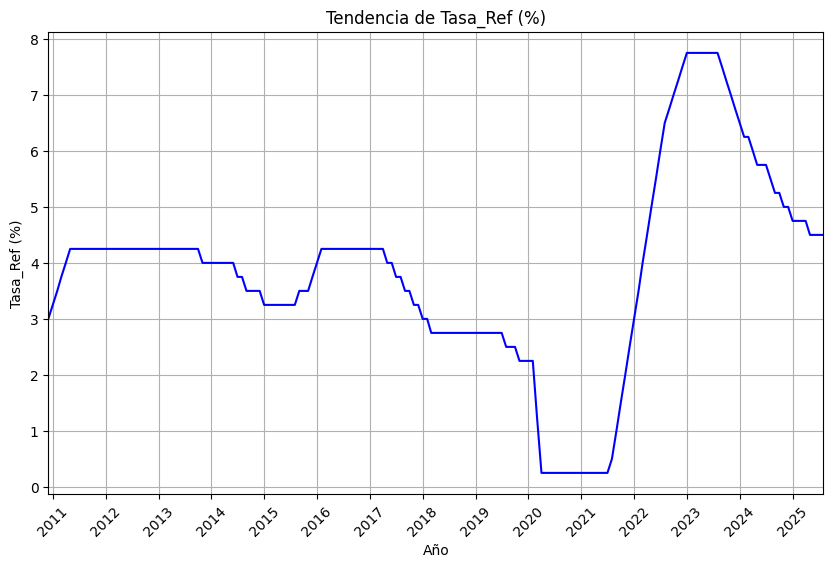

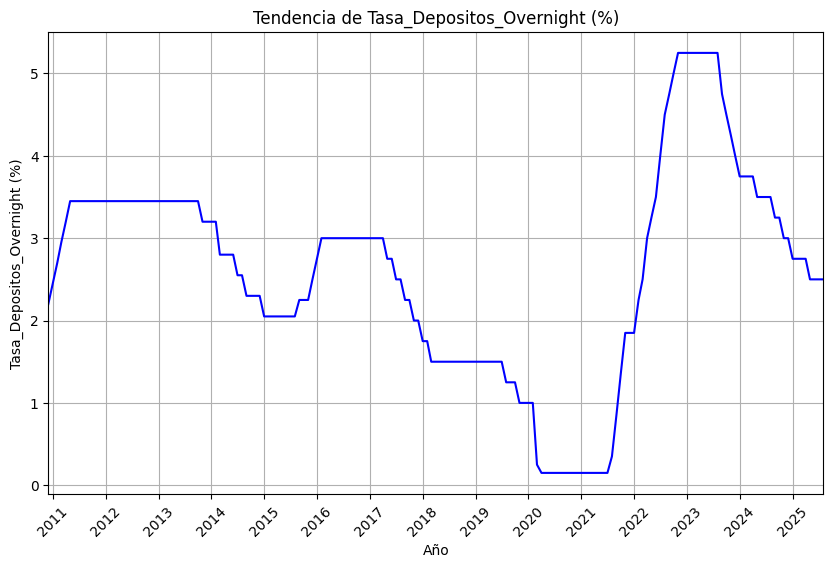

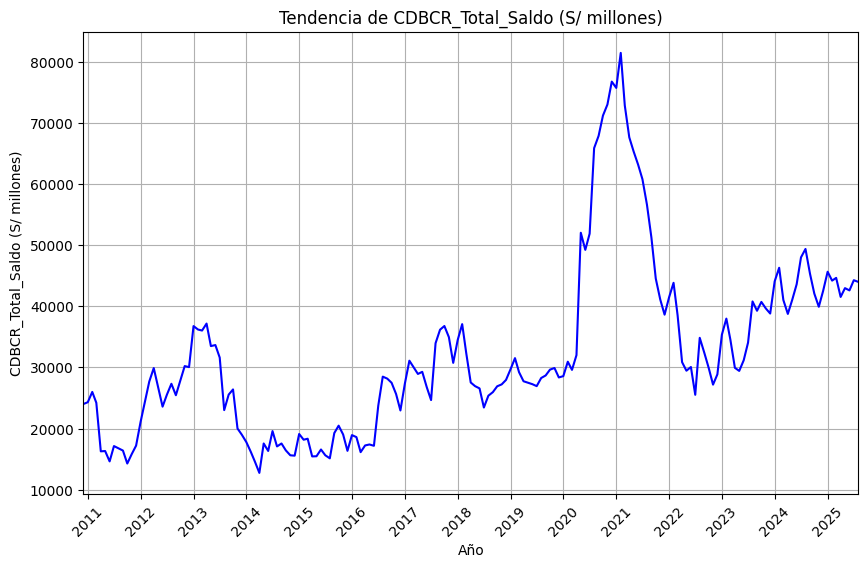

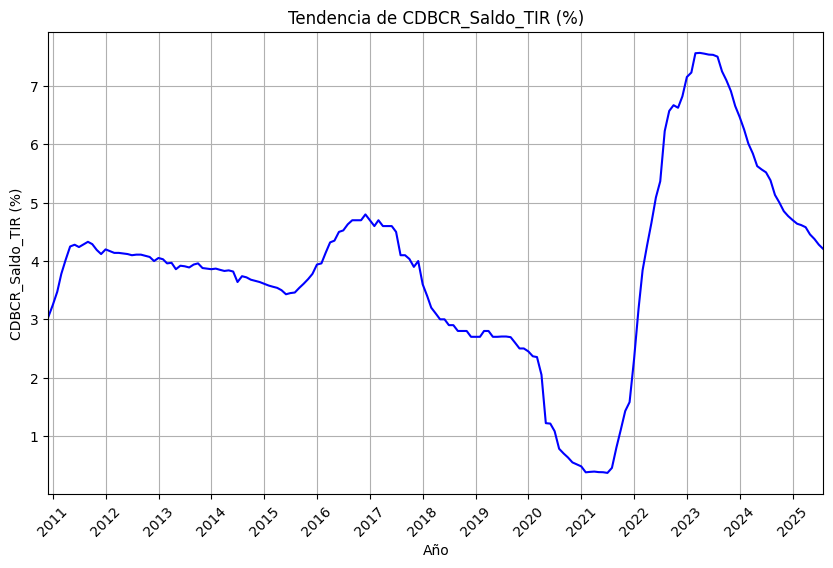

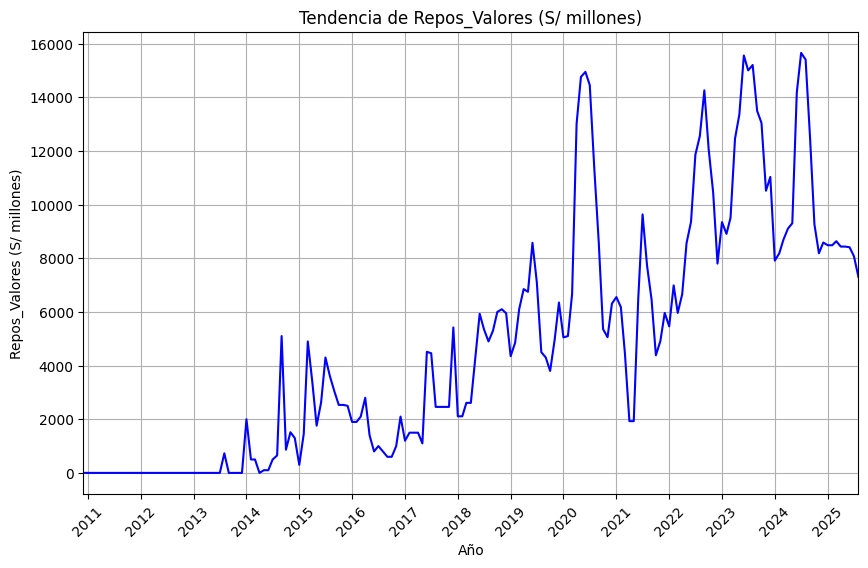

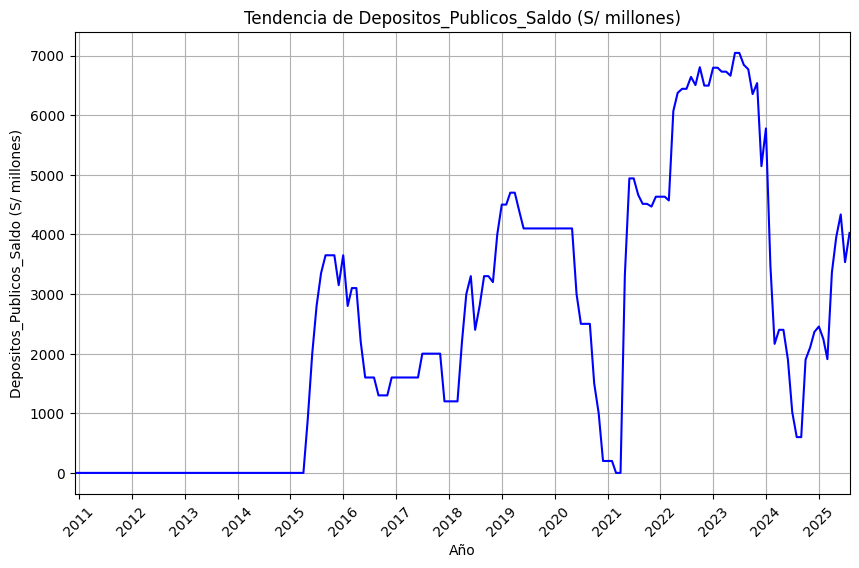

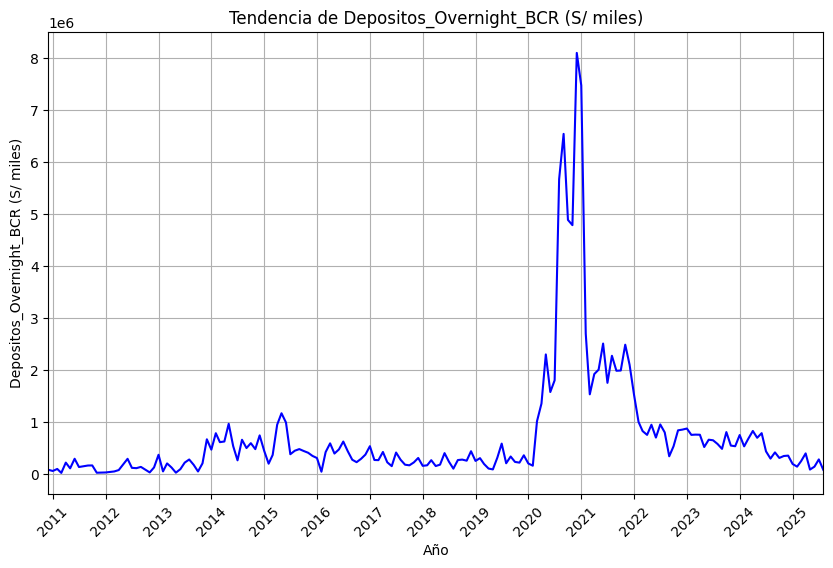

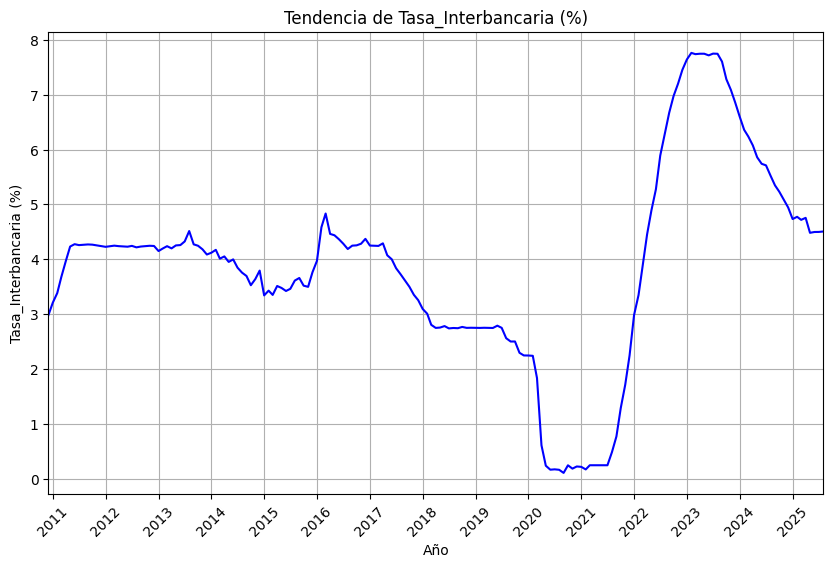

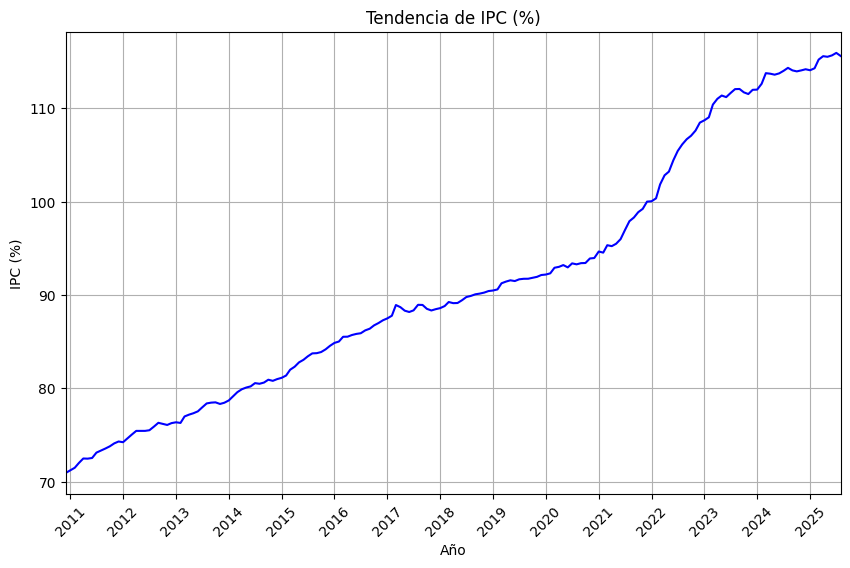

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Crear un diccionario para mapear los meses en espa√±ol al formato en ingl√©s
meses_esp = {
    'Ene': 'Jan', 'Feb': 'Feb', 'Mar': 'Mar', 'Abr': 'Apr', 'May': 'May', 'Jun': 'Jun',
    'Jul': 'Jul', 'Ago': 'Aug', 'Sep': 'Sep', 'Oct': 'Oct', 'Nov': 'Nov', 'Dic': 'Dec'
}

# Funci√≥n para convertir las fechas en espa√±ol al formato ingl√©s
def convertir_mes(fecha):
    mes, a√±o = fecha.split('.')
    mes = meses_esp[mes]  # Reemplazar el mes en espa√±ol por su equivalente en ingl√©s
    return f'{mes}.{a√±o}'

# Aplicar la funci√≥n a la columna 'Fecha'
df_bcrp['Fecha'] = df_bcrp['Fecha'].apply(convertir_mes)
df_bcrp['Fecha'] = pd.to_datetime(df_bcrp['Fecha'], format='%b.%Y')

# Definir las columnas num√©ricas de inter√©s
variables = columnas_numericas.columns

# Obtener el rango de fechas del DataFrame
fecha_min = df_bcrp['Fecha'].min()
fecha_max = df_bcrp['Fecha'].max()

# Crear un gr√°fico de tendencias para cada variable
for var in variables:
    plt.figure(figsize=(10, 6))

    # Graficar solo la l√≠nea, sin puntos
    plt.plot(df_bcrp['Fecha'], df_bcrp[var], linestyle='-', color='b')

    # Configurar el formato del eje X para mostrar solo el a√±o
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # Mostrar todos los a√±os del rango de datos
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # Mostrar todos los a√±os

    # Limitar el rango del eje X al m√≠nimo y m√°ximo de las fechas en el DataFrame
    plt.xlim([fecha_min, fecha_max])

    # Ajustes del gr√°fico
    plt.title(f'Tendencia de {var}')
    plt.xlabel('A√±o')
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()



**Interpretaci√≥n**

Las gr√°ficas muestran varias tendencias en las variables del BCRP. La Tasa de Inter√©s de Referencia, la Tasa de los Dep√≥sitos Overnight y la Tasa Interbancaria han exhibido movimientos similares a lo largo del tiempo, con picos de aumento notable. Estas tasas subieron abruptamente alrededor de finales de 2021 y se mantuvieron elevadas, alcanzando un pico en los √∫ltimos a√±os del per√≠odo analizado, lo que refleja una pol√≠tica monetaria m√°s restrictiva para combatir la inflaci√≥n.

La inflaci√≥n (IPC) tambi√©n muestra una tendencia ascendente general. Si bien presenta fluctuaciones, su valor ha aumentado significativamente, especialmente a partir de 2021. Este aumento coincide con la subida de las tasas de inter√©s, lo que indica que el BCRP ha estado respondiendo de manera activa a las presiones inflacionarias.

Los saldos en S/ millones, como CDBCR_Total_Saldo y Repos_Valores, exhiben una variabilidad considerable. El saldo de los repos ha mostrado un crecimiento notable, lo que podr√≠a indicar una mayor intervenci√≥n del BCRP en el mercado para proveer liquidez. Por otro lado, los Dep√≥sitos_P√∫blicos_Saldo muestran picos altos ocasionales, lo que puede reflejar grandes movimientos de fondos del sector p√∫blico en momentos espec√≠ficos.

### **2. HISTOGRAMAS**

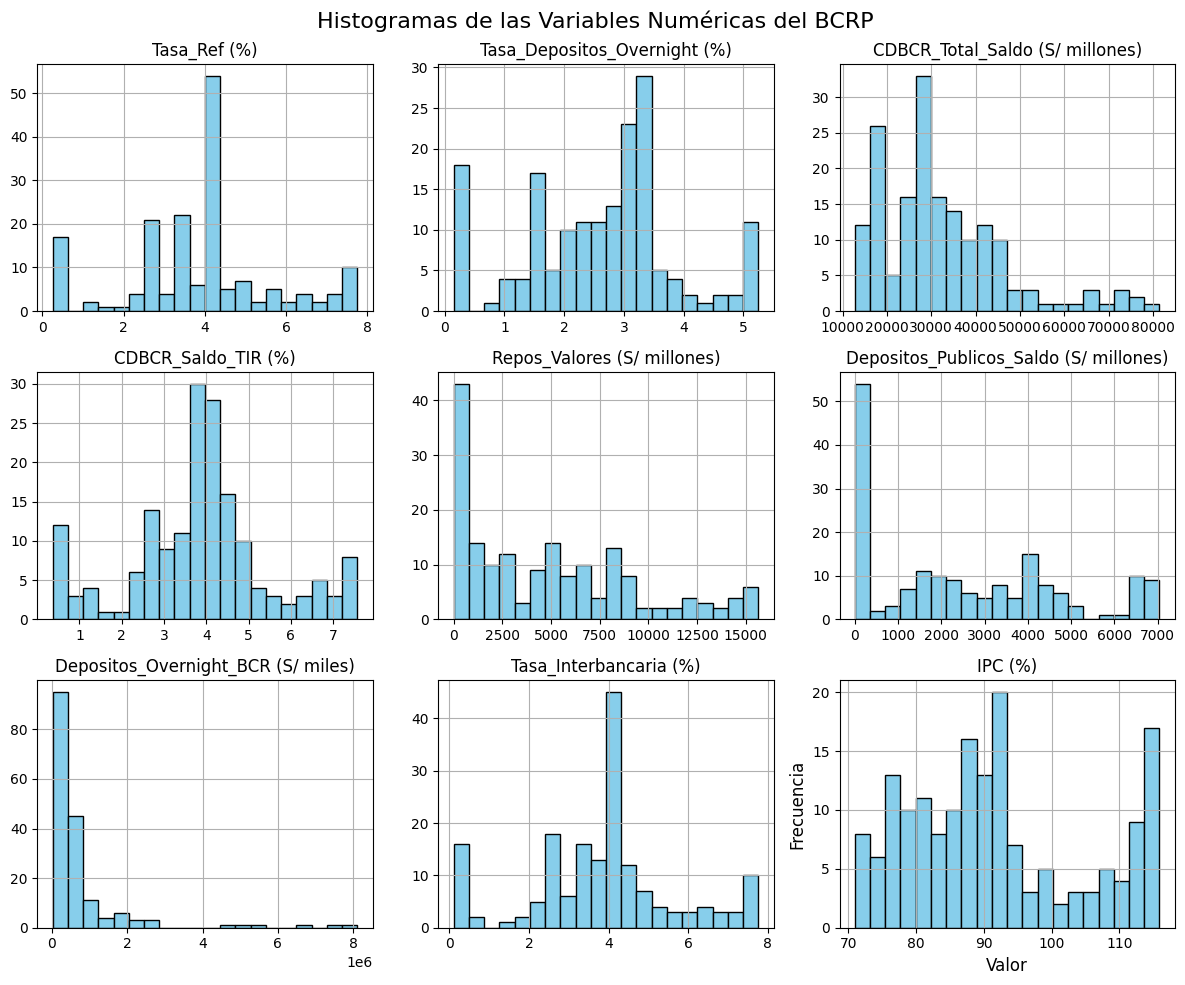

In [ ]:
import matplotlib.pyplot as plt

# Excluir la columna 'Fecha' del DataFrame para que no aparezca en el histograma
df_bcrp_sin_fecha = df_bcrp.drop(columns=['Fecha'])

# Generar un histograma para cada variable num√©rica (sin la columna 'Fecha')
df_bcrp_sin_fecha.hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')

# Ajustar el t√≠tulo y las etiquetas
plt.suptitle('Histogramas de las Variables Num√©ricas del BCRP', fontsize=16)
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gr√°fico
plt.tight_layout()
plt.show()

**Interpretaci√≥n:**

Los histogramas muestran que tanto la inflaci√≥n (IPC) como la tasa de referencia del BCRP se concentran en valores bajos durante 2010-2019, reflejando estabilidad en precios y en la pol√≠tica monetaria. Sin embargo, a partir de 2020 ambos indicadores presentan colas hacia la derecha: la inflaci√≥n se elev√≥ por choques externos vinculados al COVID-19 y a la crisis internacional de alimentos y energ√≠a, y la tasa de referencia aument√≥ como respuesta. Esto confirma que, en el corto plazo, la tasa de referencia influye en la din√°mica de la inflaci√≥n, pues sus ajustes aparecen precisamente cuando los precios se desv√≠an de la meta. Al mismo tiempo, los histogramas muestran la diferencia entre largos periodos de estabilidad (2010-2019) y episodios de crisis (2020-2022), lo que refleja que la pol√≠tica monetaria es efectiva en condiciones normales pero enfrenta limitaciones frente a shocks externos, explicando por qu√© la inflaci√≥n no retorna de inmediato al rango meta pese al endurecimiento de la tasa. En conjunto, los resultados ilustran la influencia de la tasa de referencia sobre la inflaci√≥n en el corto plazo, con efectos que se transmiten gradualmente y con ciertos rezagos.

### **3.MATRIZ DE CORRELACI√ìN**

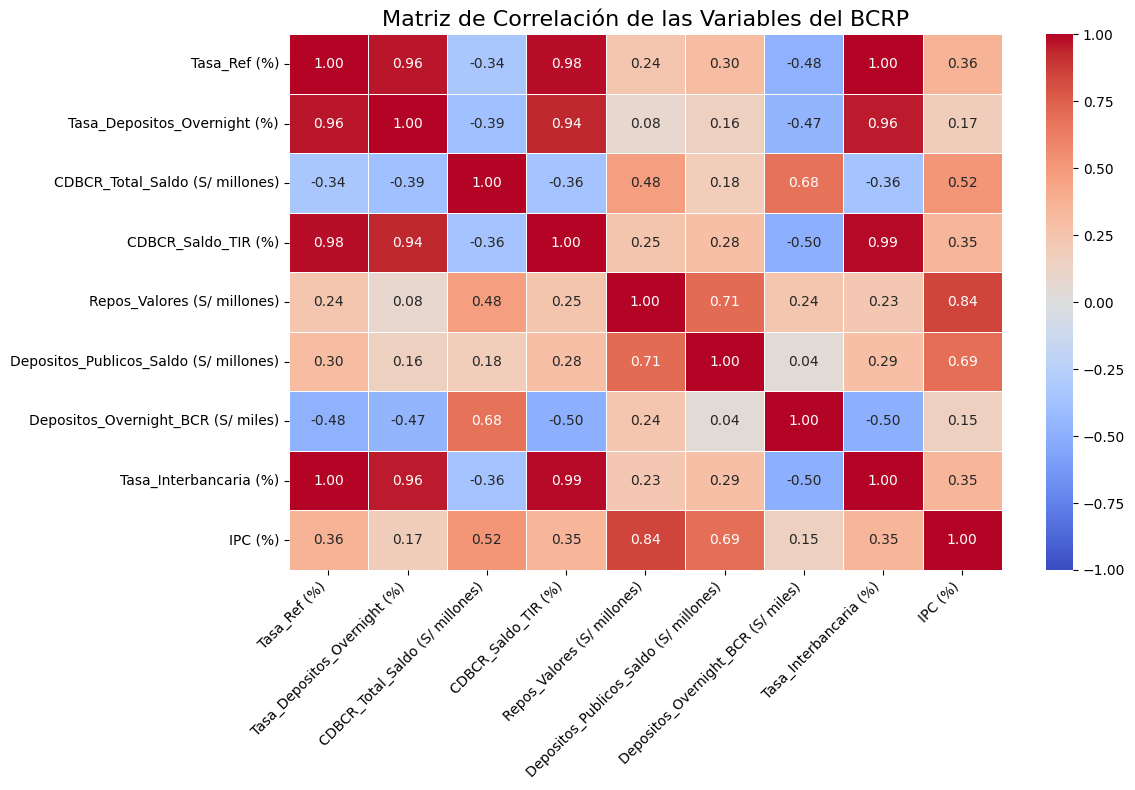

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Excluir la columna 'Fecha' para calcular la correlaci√≥n solo con las variables num√©ricas
df_bcrp_sin_fecha = df_bcrp.drop(columns=['Fecha'])

# Calcular la matriz de correlaci√≥n
correlacion = df_bcrp_sin_fecha.corr()

# Configuraci√≥n del heatmap
plt.figure(figsize=(12, 8))  # Ajustar tama√±o de la figura
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# T√≠tulo y etiquetas
plt.title('Matriz de Correlaci√≥n de las Variables del BCRP', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Mostrar el gr√°fico
plt.tight_layout()
plt.show()


**Interpretaci√≥n:**

El mapa de calor proporcionado muestra una correlaci√≥n positiva moderada (0.36) entre la "Tasa_Ref (%)" y el "IPC (%)", lo que sugiere que un aumento en la tasa de referencia a menudo se asocia con un aumento en la inflaci√≥n. Esta aparente paradoja se debe a que el BCRP no sube la tasa de forma arbitraria, sino que lo hace como una respuesta reactiva a las presiones inflacionarias existentes. En otras palabras, la tasa de referencia se ajusta despu√©s de que la inflaci√≥n ya ha comenzado a subir, buscando contrarrestar ese aumento y guiarla de nuevo hacia el rango meta del banco central.

Otros canales de transmisi√≥n, como el del tipo de cambio, tambi√©n juegan un papel importante. Una subida en la tasa de referencia puede hacer que el Sol peruano sea m√°s atractivo para los inversores extranjeros, lo que llevar√≠a a una apreciaci√≥n de la moneda. Esto a su vez abarata las importaciones y reduce la inflaci√≥n, especialmente en el caso de bienes que dependen de la importaci√≥n. Aunque el efecto no siempre es inmediato, en el corto plazo la influencia de la pol√≠tica monetaria es el principal motor para controlar la inflaci√≥n en el Per√∫.

### **5.CORRELACION ENTRE PARES DE VARIABLES**

In [ ]:

# Excluir la columna 'Fecha' para calcular solo las correlaciones de las variables num√©ricas
df_bcrp_sin_fecha = df_bcrp.drop(columns=['Fecha'])

# Calcular la matriz de correlaci√≥n
correlacion = df_bcrp_sin_fecha.corr()

# Convertir la matriz de correlaci√≥n en un formato largo (pairs de variables)
correlacion_larga = correlacion.unstack()

# Filtrar los pares con correlaci√≥n absoluta mayor A 0.8
correlacion_fuerte = correlacion_larga[(correlacion_larga.abs() > 0.8) & (correlacion_larga != 1)]

# Ordenar los pares de correlaci√≥n de mayor a menor
correlacion_fuerte = correlacion_fuerte.sort_values(ascending=False)

# Mostrar los pares de variables m√°s correlacionadas
print("Pares de variables con correlaci√≥n m√°s alta:")
print(correlacion_fuerte)

Pares de variables con correlaci√≥n m√°s alta:
Tasa_Ref (%)                  Tasa_Interbancaria (%)          0.997936
Tasa_Interbancaria (%)        Tasa_Ref (%)                    0.997936
CDBCR_Saldo_TIR (%)           Tasa_Interbancaria (%)          0.986148
Tasa_Interbancaria (%)        CDBCR_Saldo_TIR (%)             0.986148
CDBCR_Saldo_TIR (%)           Tasa_Ref (%)                    0.983342
Tasa_Ref (%)                  CDBCR_Saldo_TIR (%)             0.983342
Tasa_Depositos_Overnight (%)  Tasa_Ref (%)                    0.963323
Tasa_Ref (%)                  Tasa_Depositos_Overnight (%)    0.963323
Tasa_Interbancaria (%)        Tasa_Depositos_Overnight (%)    0.959077
Tasa_Depositos_Overnight (%)  Tasa_Interbancaria (%)          0.959077
                              CDBCR_Saldo_TIR (%)             0.936616
CDBCR_Saldo_TIR (%)           Tasa_Depositos_Overnight (%)    0.936616
Repos_Valores (S/ millones)   IPC (%)                         0.844560
IPC (%)                       

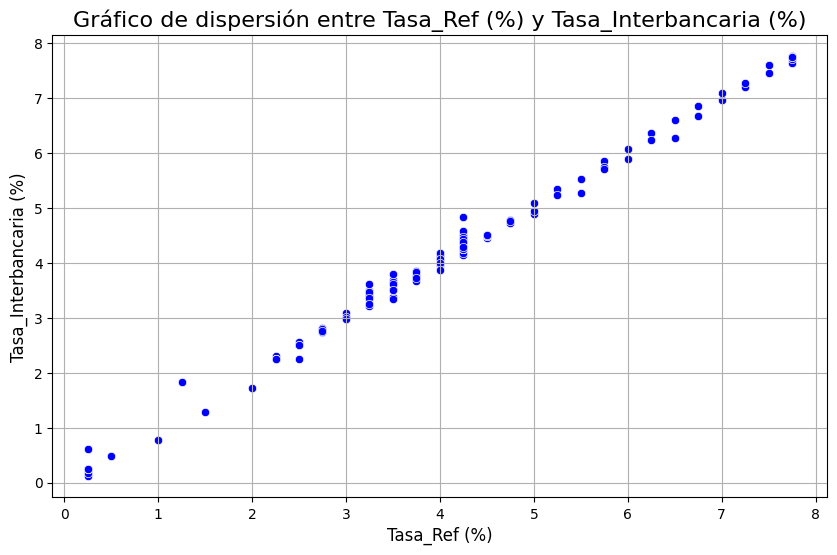

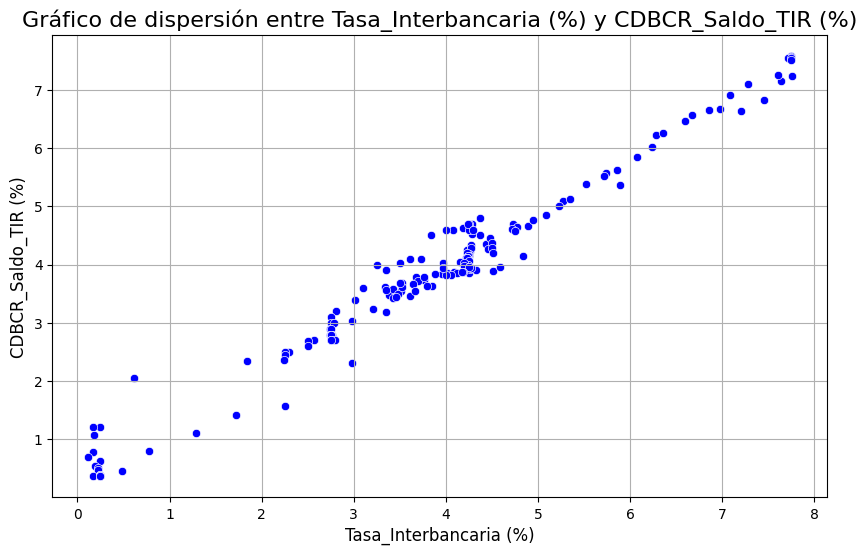

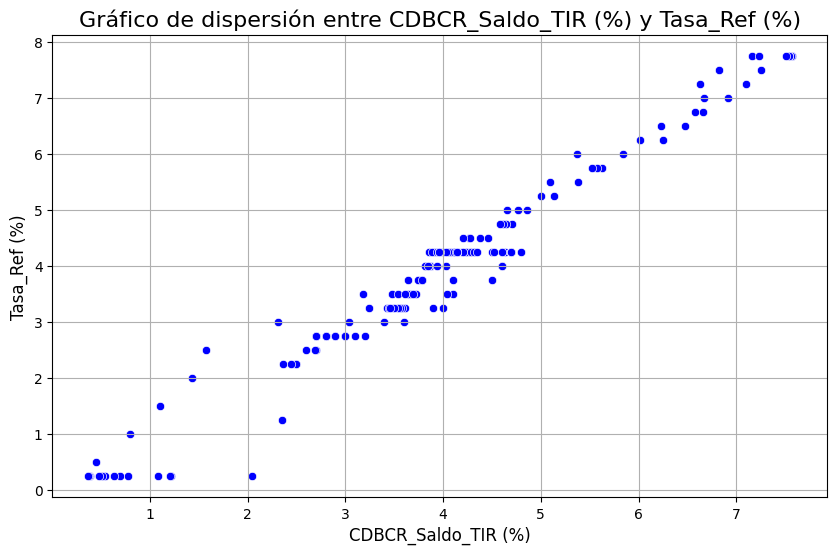

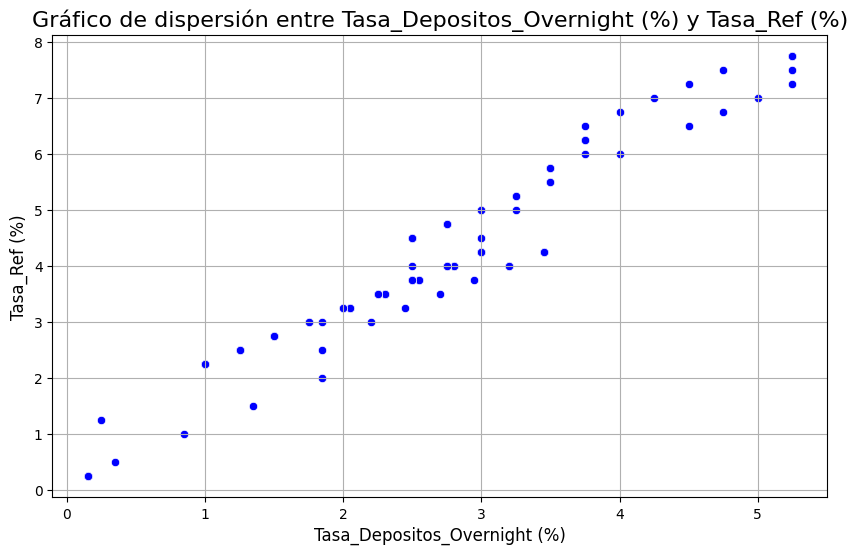

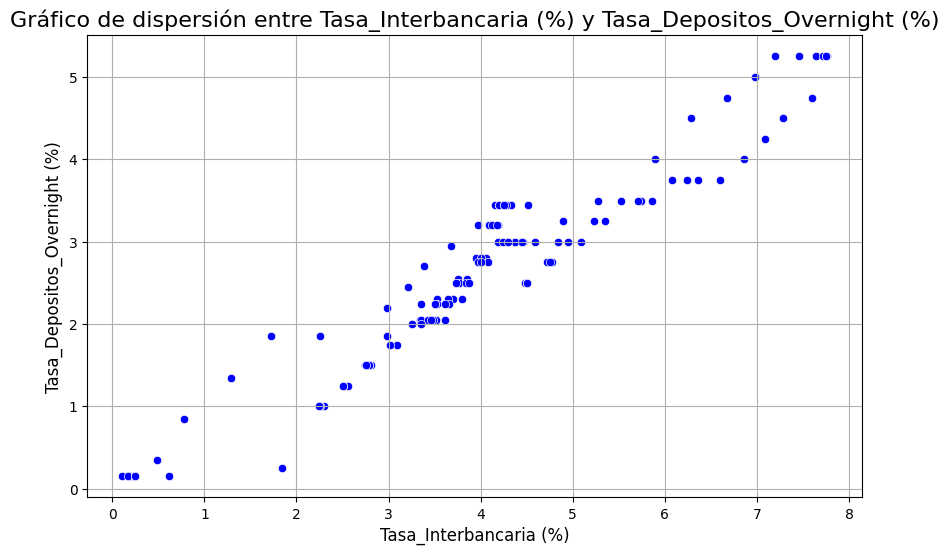

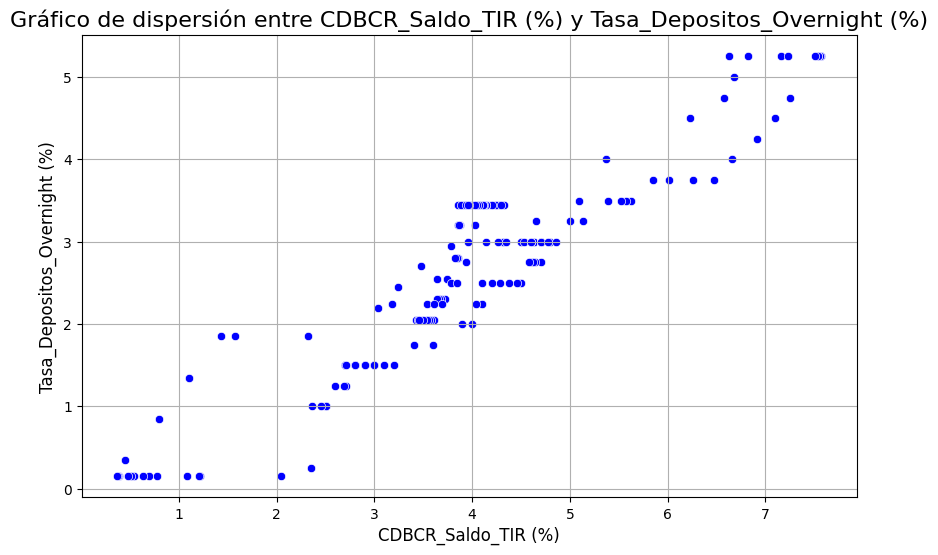

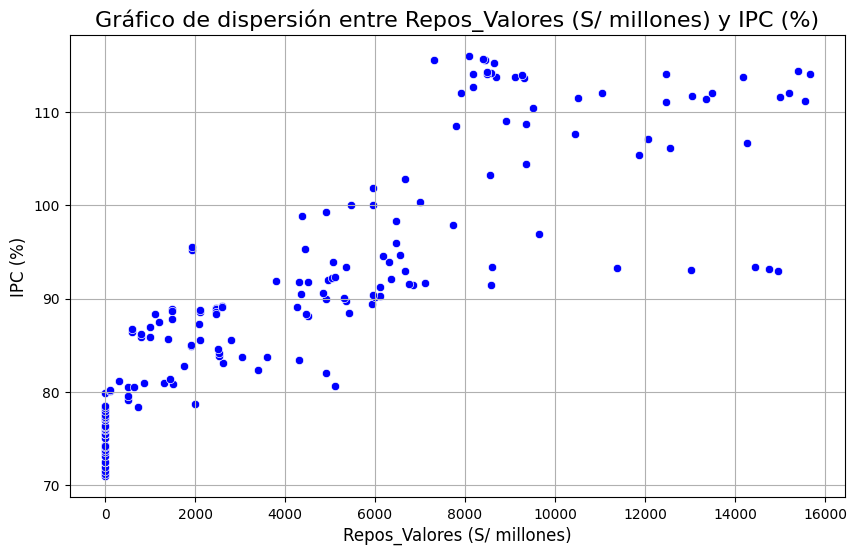

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear gr√°ficos de dispersi√≥n para los pares con correlaciones m√°s altas
pares_correlacionados = [
    ('Tasa_Ref (%)', 'Tasa_Interbancaria (%)'),
    ('Tasa_Interbancaria (%)', 'CDBCR_Saldo_TIR (%)'),
    ('CDBCR_Saldo_TIR (%)', 'Tasa_Ref (%)'),
    ('Tasa_Depositos_Overnight (%)', 'Tasa_Ref (%)'),
    ('Tasa_Interbancaria (%)', 'Tasa_Depositos_Overnight (%)'),
    ('CDBCR_Saldo_TIR (%)','Tasa_Depositos_Overnight (%)'),
    ('Repos_Valores (S/ millones)', 'IPC (%)')
]

# Crear gr√°ficos de dispersi√≥n para cada par
for var1, var2 in pares_correlacionados:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df_bcrp[var1], y=df_bcrp[var2], color='blue')
    plt.title(f'Gr√°fico de dispersi√≥n entre {var1} y {var2}', fontsize=16)
    plt.xlabel(var1, fontsize=12)
    plt.ylabel(var2, fontsize=12)
    plt.grid(True)
    plt.show()


**Interpretaci√≥n:**

Los gr√°ficos de dispersi√≥n entre las tasas de inter√©s (Tasa_Ref, Tasa_Depositos_Overnight, Tasa_Interbancaria) y el IPC (%) muestran una relaci√≥n positiva. Esto se puede ver en la forma en que los puntos tienden a agruparse en una l√≠nea ascendente: a medida que los valores de las tasas de inter√©s suben, el IPC tambi√©n tiende a aumentar. Esto podr√≠a parecer contradictorio, ya que el objetivo de subir las tasas es controlar la inflaci√≥n. Sin embargo, este comportamiento se debe a que el BCRP es un agente reactivo. Es decir, las tasas se suben despu√©s de que el IPC ya ha empezado a subir, en un intento por contrarrestar la inflaci√≥n.

En el gr√°fico que compara el IPC (%) con los Saldos de los Repos de Valores (S/ millones), se aprecia una correlaci√≥n positiva fuerte. Esto sugiere que, a medida que la inflaci√≥n aumenta, el volumen de operaciones de reposiciones de valores tambi√©n lo hace. Esto podr√≠a ser el resultado de un mayor uso de estos instrumentos por parte del BCRP para gestionar la liquidez en el mercado en respuesta a las presiones inflacionarias.

En cuanto a la relaci√≥n entre la Tasa de Referencia y el saldo de CDBR_Total_Saldo, el gr√°fico muestra una correlaci√≥n negativa. A medida que la Tasa de Referencia aumenta, el saldo de los CDBR disminuye. Esto es l√≥gico, ya que cuando las tasas de inter√©s suben, los bancos pueden preferir invertir en otros instrumentos m√°s rentables en lugar de mantener sus fondos en el BCRP a trav√©s de estos Certificados.